<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_5_Text_Classification_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [104]:
data = pd.read_csv("/content/drive/My Drive/Tensorflow_2.0/Data/amazon_alexa.tsv", sep="\t")
data.head(10)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [105]:
data.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [106]:
data["verified_reviews"]

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [108]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [109]:
postitive_reviews = data[data["feedback"] == 1]
postitive_reviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [110]:
negative_reviews = data[data["feedback"] == 0]
negative_reviews

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


Text(0.5, 1.0, 'Negative And Positive FeedBack Count')

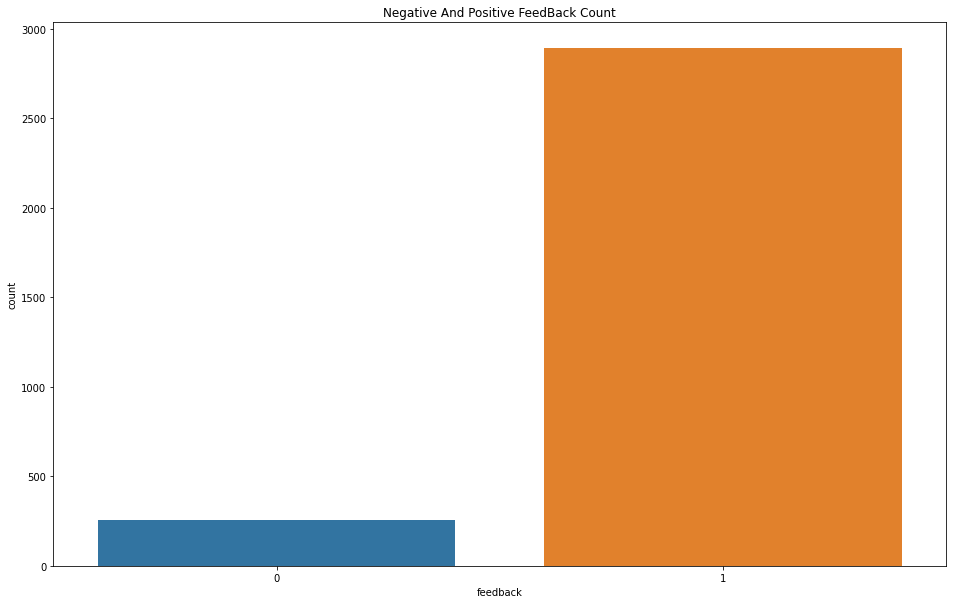

In [111]:
plt.figure(figsize=(16,10))
sns.countplot(data["feedback"], label="Count")
plt.title("Negative And Positive FeedBack Count")

Text(0.5, 1.0, 'Rating Count')

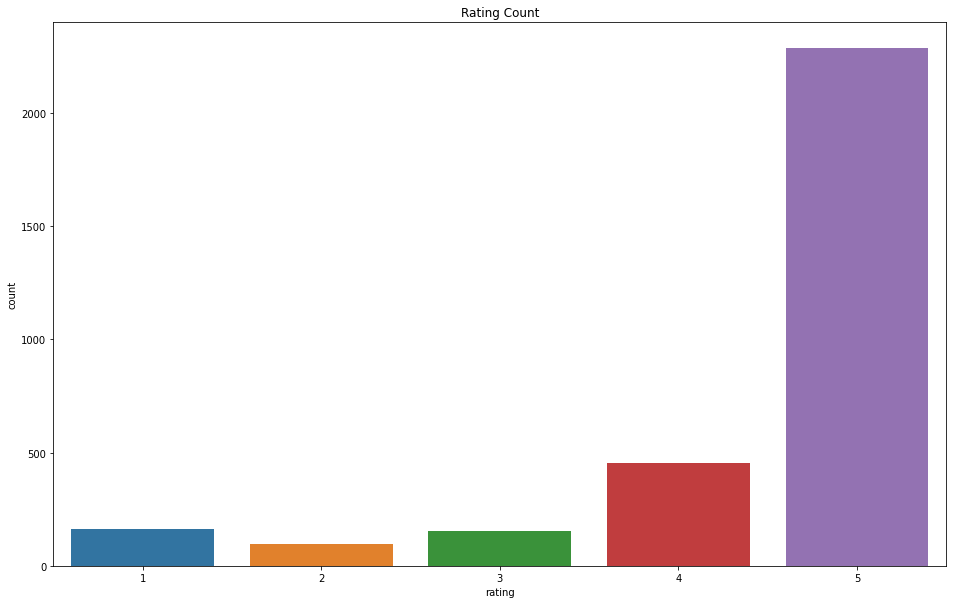

In [112]:
plt.figure(figsize=(16,10))
sns.countplot(data=data, x="rating")
plt.title("Rating Count")

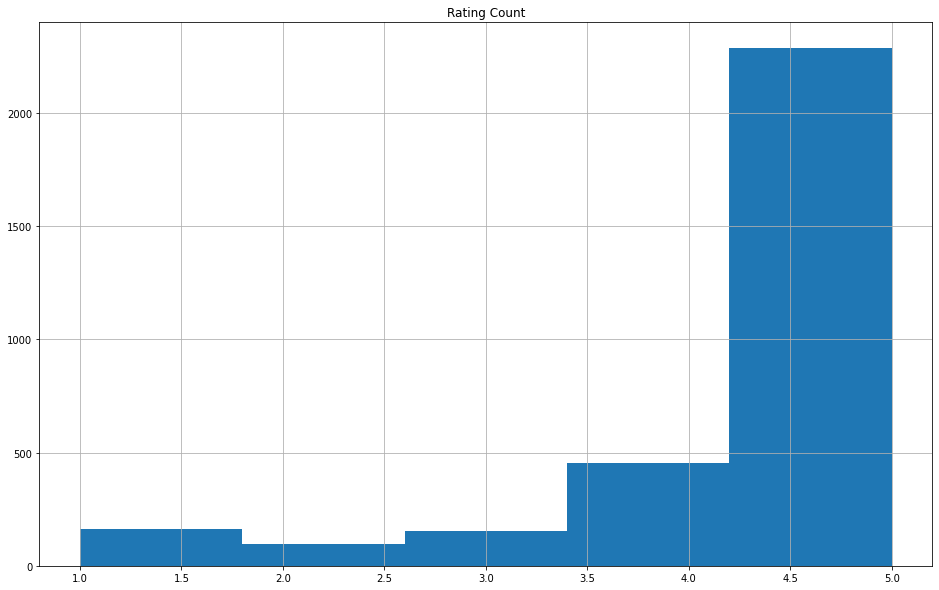

In [113]:
plt.figure(figsize=(16,10))
plt.title("Rating Count")
data["rating"].hist(bins=5)

Text(0.5, 1.0, 'Variation Vs Rating')

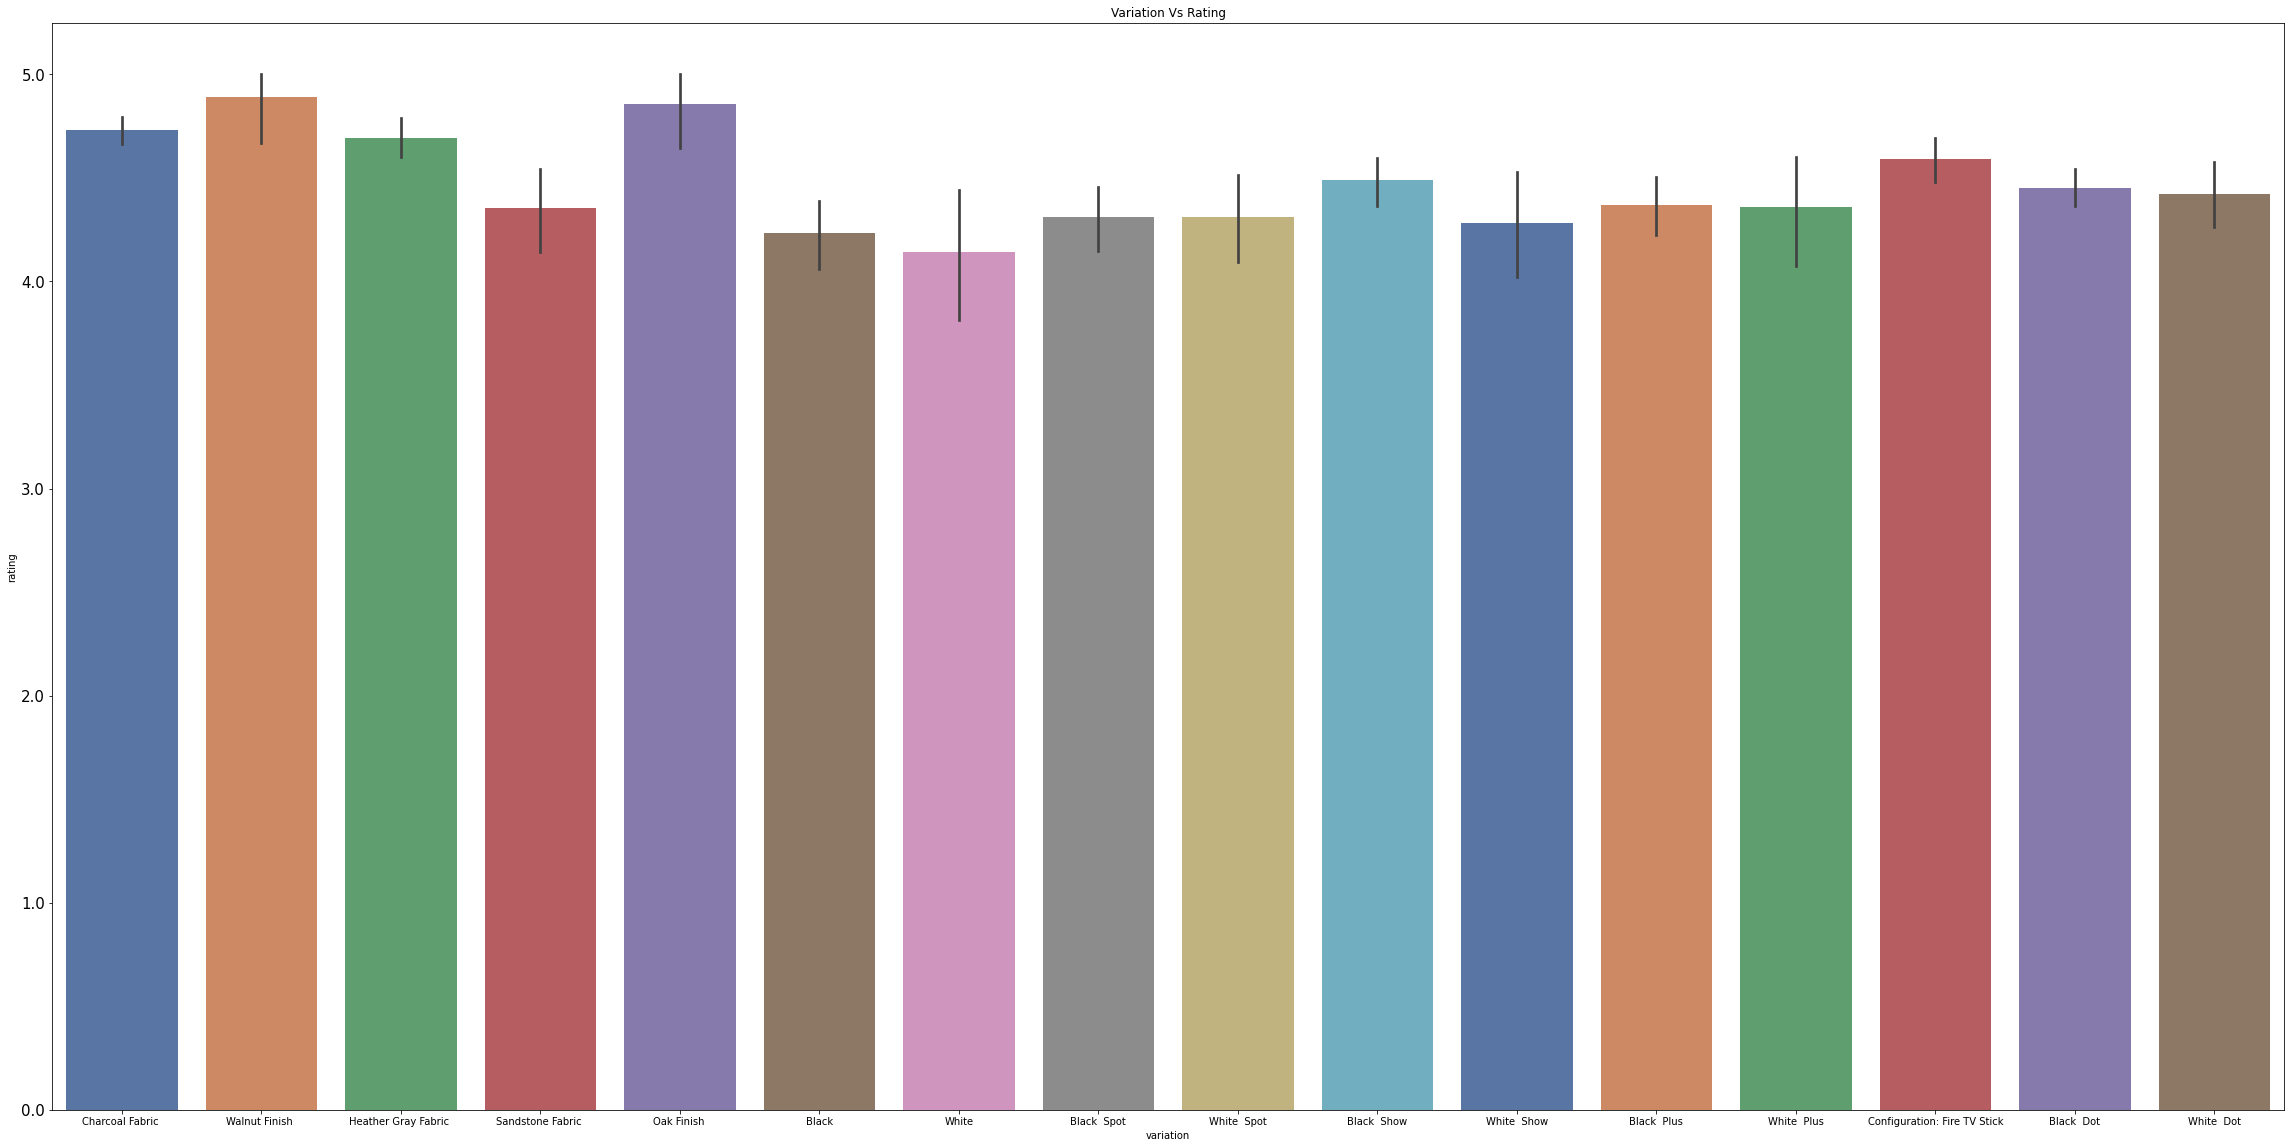

In [114]:
plt.figure(figsize=(40,20))
b = sns.barplot(data=data, y="rating", x="variation", palette="deep")
b.set_yticklabels(b.get_yticks(), size=15)
plt.title("Variation Vs Rating")

#Clean Up

In [115]:
data = data.drop(["date", "rating"], axis=1)
data.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [116]:
# creating dummpy from variation Categorical Data
variation_dummy = pd.get_dummies(data["variation"], drop_first=True)
variation_dummy

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [117]:
data.drop(["variation"], axis=1, inplace=True)
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [118]:
data = pd.concat([data, variation_dummy], axis=1)
data.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [119]:
data.tail()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3149,Good,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Tokeniation

In [120]:
vectorizer = CountVectorizer()
data_count_vector = vectorizer.fit_transform(data["verified_reviews"])
data_count_vector.shape

(3150, 4044)

In [121]:
vectorizer.get_feature_names()

['00',
 '000',
 '07',
 '10',
 '100',
 '100x',
 '11',
 '1100sf',
 '12',
 '129',
 '12am',
 '15',
 '150',
 '18',
 '19',
 '1964',
 '1990',
 '1gb',
 '1rst',
 '1st',
 '20',
 '200',
 '2000',
 '2017',
 '229',
 '23',
 '24',
 '25',
 '29',
 '2nd',
 '2package',
 '30',
 '300',
 '30pm',
 '34',
 '360',
 '39',
 '3rd',
 '3x',
 '3xs',
 '40',
 '45',
 '48',
 '4am',
 '4ghz',
 '4k',
 '4th',
 '50',
 '54',
 '5am',
 '5ghz',
 '5th',
 '600',
 '62',
 '672',
 '6th',
 '70',
 '75',
 '79',
 '80',
 '80s',
 '81',
 '83',
 '85',
 '88',
 '888',
 '8gb',
 '90',
 '91',
 '911',
 '99',
 '_specifically_',
 'a1',
 'a19',
 'abay',
 'abc',
 'abd',
 'abilities',
 'ability',
 'able',
 'abode',
 'about',
 'above',
 'absolutely',
 'absolutly',
 'ac',
 'accent',
 'acceptable',
 'accepting',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessories',
 'accesss',
 'accident',
 'accidentally',
 'accompanying',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accu

In [122]:
data_count_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#wordCloud

In [123]:
word_cloud_string =' '.join( postitive_reviews["verified_reviews"])

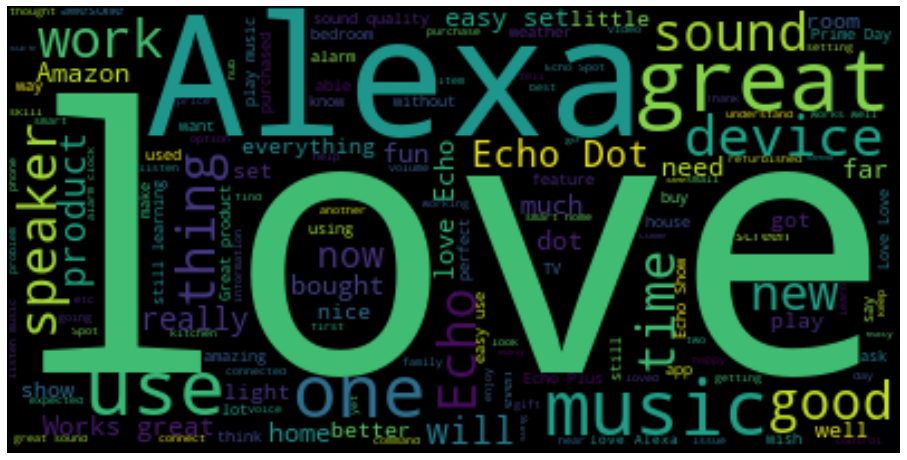

In [124]:
wordcloud = WordCloud(max_font_size=200)
wordcloud.generate(word_cloud_string)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [125]:
data_count_vector.shape

(3150, 4044)

In [126]:
data.drop(["verified_reviews"], axis=1, inplace=True)

In [127]:
data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [128]:
df_count_vector = pd.DataFrame(data=data_count_vector.toarray())
df_count_vector.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
df_count_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Columns: 4044 entries, 0 to 4043
dtypes: int64(4044)
memory usage: 97.2 MB


In [130]:
len(vectorizer.get_feature_names())

4044

In [131]:
data = pd.concat([data, df_count_vector], axis=1)

In [132]:
data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
x_data = data.drop(["feedback"], axis=1)
x_data.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
y_data = data["feedback"]
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [135]:
x_data.shape

(3150, 4059)

In [136]:
y_data.shape

(3150,)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [138]:
x_train.shape

(2520, 4059)

In [139]:
x_test.shape

(630, 4059)

In [140]:
y_train.shape

(2520,)

In [141]:
y_test.shape

(630,)

In [142]:
ann_classifier = tf.keras.models.Sequential()

In [143]:
ann_classifier.add(tf.keras.layers.Dense(units=400, activation="relu", input_shape=(4059,)))
ann_classifier.add(tf.keras.layers.Dense(units=400, activation="relu"))
ann_classifier.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [144]:
ann_classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               1624000   
_________________________________________________________________
dense_11 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 401       
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [145]:
ann_classifier.compile("Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [146]:
epochs_hist = ann_classifier.fit(x_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 13ms/step - loss: 0.2858 - accuracy: 0.9139
Epoch 2/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0998 - accuracy: 0.9627
Epoch 3/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0345 - accuracy: 0.9889
Epoch 4/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0180 - accuracy: 0.9913
Epoch 6/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0174 - accuracy: 0.9929
Epoch 7/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0179 - accuracy: 0.9929
Epoch 8/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0178 - accuracy: 0.9929
Epoch 9/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0176 - accuracy: 0.9913
Epoch 10/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0173 - accuracy: 0.9933


In [164]:
y_prediction = ann_classifier.predict(x_train)
y_prediction

array([[1.0000000e+00],
       [9.9784541e-01],
       [9.9999976e-01],
       ...,
       [1.0000000e+00],
       [6.2710249e-05],
       [9.9999976e-01]], dtype=float32)

In [165]:
y_pred_train = y_prediction >0.5
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

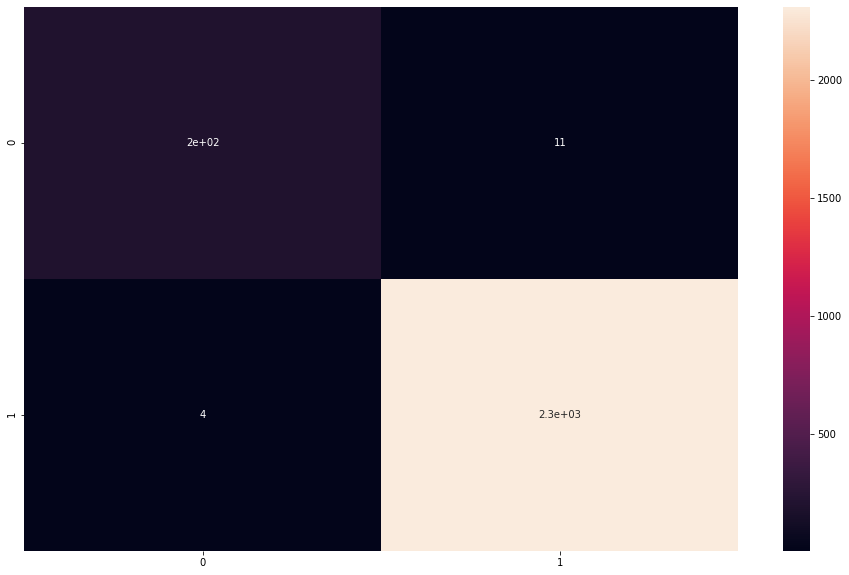

In [166]:
cm_metrics = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(16,10))
sns.heatmap(cm_metrics, annot=True)

In [170]:
y_prediction_test = ann_classifier.predict(x_test)
y_prediction_test

array([[3.7603980e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9624717e-01],
       [1.0000000e+00],
       [9.9903280e-01],
       [9.9788260e-01],
       [9.9998784e-01],
       [9.9989724e-01],
       [9.9095845e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999261e-01],
       [1.0000000e+00],
       [9.9724960e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9994528e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9833608e-01],
       [1.0000000e+00],
       [9.9194533e-01],
       [9.9999672e-01],
       [9.9968624e-01],
       [9.9967635e-01],
       [9.9999362e-01],
       [1.0000000e+00],
       [9.9984366e-01],
       [9.9996495e-01],
       [1.0000000e+00],
       [9.9611068e-01],
       [9.9976546e-01],
       [9.9999970e-01],
       [9.9999702e-01],
       [1.0000000e+00],
       [9.9937022e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [3.070036

In [172]:
y_pred_test = y_prediction_test >0.5
y_prediction_test

array([[3.7603980e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9624717e-01],
       [1.0000000e+00],
       [9.9903280e-01],
       [9.9788260e-01],
       [9.9998784e-01],
       [9.9989724e-01],
       [9.9095845e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999261e-01],
       [1.0000000e+00],
       [9.9724960e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9994528e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9833608e-01],
       [1.0000000e+00],
       [9.9194533e-01],
       [9.9999672e-01],
       [9.9968624e-01],
       [9.9967635e-01],
       [9.9999362e-01],
       [1.0000000e+00],
       [9.9984366e-01],
       [9.9996495e-01],
       [1.0000000e+00],
       [9.9611068e-01],
       [9.9976546e-01],
       [9.9999970e-01],
       [9.9999702e-01],
       [1.0000000e+00],
       [9.9937022e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [3.070036

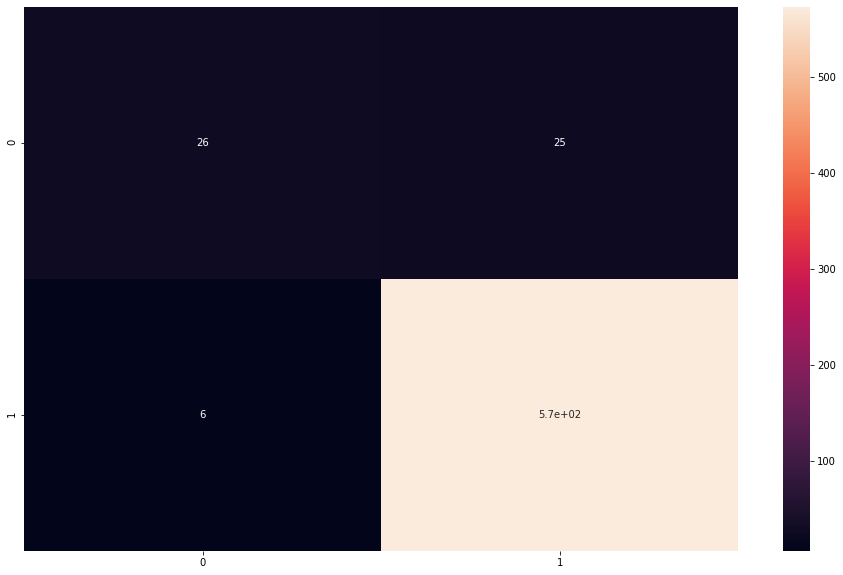

In [174]:
cm_metrics = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(16,10))
sns.heatmap(cm_metrics, annot=True)

In [175]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Model Training loss')

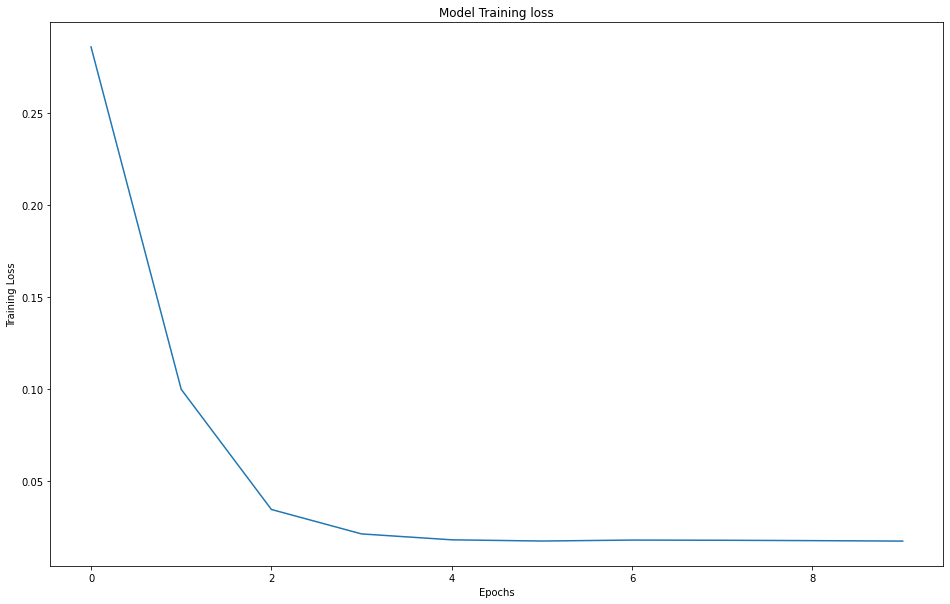

In [178]:
plt.figure(figsize=(16,10))
plt.plot(epochs_hist.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Model Training loss")


Text(0.5, 1.0, 'Model Training accuracy')

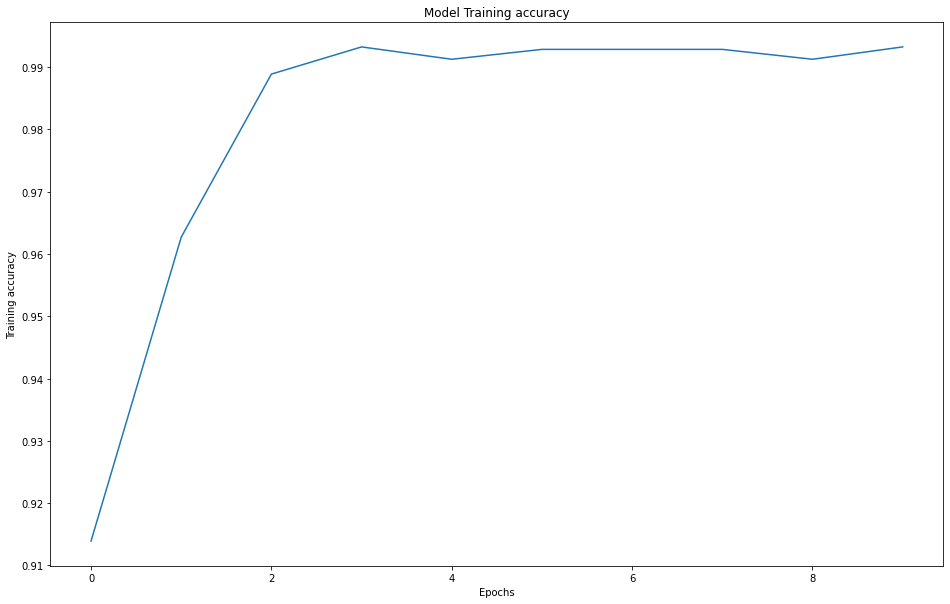

In [185]:
plt.figure(figsize=(16,10))
plt.plot(epochs_hist.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.title("Model Training accuracy")
